# Geometric primitives and transformations

Here we give some interactive snippets to play with 2D geometric primitives and their transformations. We partly follow the chapter 2 of R. Szeliski [book](http://szeliski.org/Book/drafts/SzeliskiBook_20100903_draft.pdf)

## Geometric primitives : points and lines in 2D

2D points $\vec{x} = (x, y) \in \mathcal{R}^2$  can be also presented in homogeneous coordinates as $\mathbf{x} = (x, y, 1)$

2D lines can be written as $\mathbf{l} \cdot \mathbf{x} = \cos(\theta) \, x + \sin(\theta) \, y + d = 0$, with $\mathbf{l}=(\cos(\theta), \sin(\theta), d)$

In [40]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
from matplotlib.lines import Line2D

from math import pi
from ipywidgets import interact, FloatSlider

x = np.arange(-3.0, 3.0, 0.005)

Following snippet draws interactively a 2D line specifying $\theta$ (angle beetween OX and a normal to the line) and $d$ (distance from zero point to the line) 

<IPython.core.display.Javascript object>


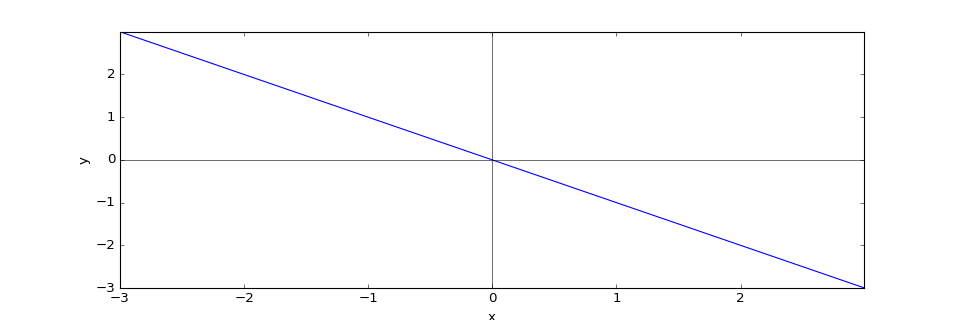

<function __main__.interactive_2d_line>

In [41]:
fig = None
def interactive_2d_line(theta, d):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure(figsize=(12,4))
    s = np.sin(theta * pi / 180.0)
    y = -d / s - x * np.cos(theta * pi / 180.0) / s
    
    plt.plot(x, y); plt.xlabel("x"); plt.ylabel("y")
    plt.xlim([np.min(x),np.max(x)]); plt.ylim([np.min(x),np.max(x)])
    plt.axvline(color='k', linewidth=0.5); plt.axhline(color='k', linewidth=0.5)

    
interact(interactive_2d_line,           
         theta=FloatSlider(value=45, min=0.1, max=359, continuous_update=False), 
         d=FloatSlider(value=0.0, min=-5.0, max=5.0, continuous_update=False))

Intersection between two lines is computed as : $ \mathbf{x} = \mathbf{l_1} \times \mathbf{l_2}$. 

Following snippet draws interactively two 2D lines specifying $\theta$ (angle beetween OX and a normal to the line) and $d$ (distance from zero point to the line) for each line. Figure title displays the coordinates of the intersection point.

<IPython.core.display.Javascript object>


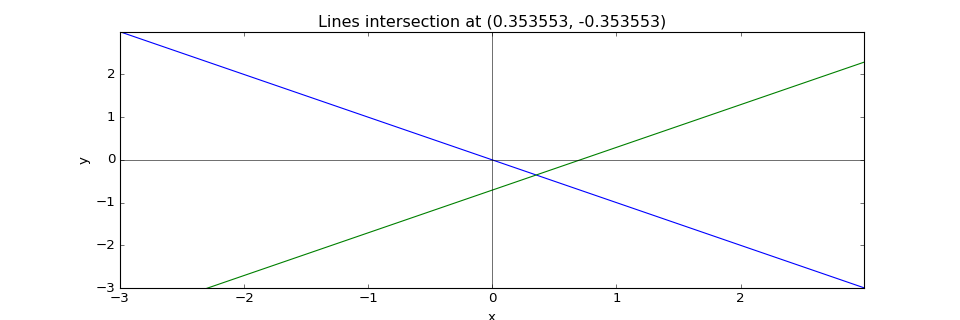

<function __main__.interactive_2d_lines_intersection>

In [42]:
fig = None
def interactive_2d_lines_intersection(theta1, d1, theta2, d2):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure(figsize=(12,4))
    
    s1 = np.sin(theta1 * pi / 180.0); c1 = np.cos(theta1 * pi / 180.0); y1 = -d1 / s1 - x *  c1 / s1
    s2 = np.sin(theta2 * pi / 180.0); c2 = np.cos(theta2 * pi / 180.0); y2 = -d2 / s2 - x *  c2 / s2
    
    pt_intersection = np.cross([c1, s1, d1], [c2, s2, d2])
    if np.abs(pt_intersection[2]) > 0:
        x_int, y_int = pt_intersection[0]/pt_intersection[2], pt_intersection[1]/pt_intersection[2]
    else:
        x_int, y_int = np.inf, np.inf
    
    plt.plot(x, y1); plt.plot(x, y2)
    
    plt.title("Lines intersection at (%f, %f)" % (x_int, y_int))
    plt.xlabel("x"); plt.ylabel("y")
    plt.xlim([np.min(x),np.max(x)]); plt.ylim([np.min(x),np.max(x)])
    plt.axvline(color='k', linewidth=0.5); plt.axhline(color='k', linewidth=0.5)


    
interact(interactive_2d_lines_intersection,           
         theta1=FloatSlider(value=45, min=0.1, max=359, continuous_update=False), 
         d1=FloatSlider(value=0.0, min=-5.0, max=5.0, continuous_update=False),
         theta2=FloatSlider(value=135, min=0.1, max=359, continuous_update=False), 
         d2=FloatSlider(value=0.5, min=-5.0, max=5.0, continuous_update=False))

Line joining two points $\mathbf{x_1}$ and $\mathbf{x_2}$ can be computed as : $\mathbf{l} = \mathbf{x_1} \times \mathbf{x_2}$. Thus, line parameters can be computed as $\cos(\theta) = y_1 - y_2$, $\sin(\theta) = x_2 - x_1$ and $d = x_1 y_2 - y_1 x_2$


Following snippet draws interactively a 2d line passing through two points defined by their coordinates


<IPython.core.display.Javascript object>


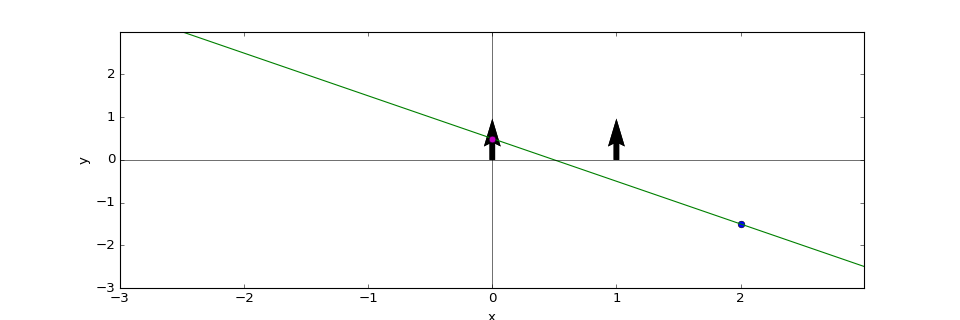

<function __main__.interactive_2d_line_from_points>

In [43]:
fig = None
def interactive_2d_line_from_points(x1, y1, x2, y2):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure(figsize=(12,4))
    
    s = x2 - x1 + 0.00001; c = y1 - y2; d = x1 * y2 - y1 * x2; y = -d / s - x *  c / s

    plt.plot([x1, x2], [y1, y2], 'o'); plt.plot(x, y)
    
    plt.xlabel("x"); plt.ylabel("y")
    plt.xlim([np.min(x),np.max(x)]); plt.ylim([np.min(x),np.max(x)])
    plt.axvline(color='k', linewidth=0.5); plt.axhline(color='k', linewidth=0.5)

    
interact(interactive_2d_line_from_points,           
         x1=FloatSlider(value=0, min=-3.0, max=3.0, continuous_update=False), 
         y1=FloatSlider(value=0.5, min=-3.0, max=3.0, continuous_update=False), 
         x2=FloatSlider(value=2.0, min=-3.0, max=3.0, continuous_update=False), 
         y2=FloatSlider(value=-1.5, min=-3.0, max=3.0, continuous_update=False))

## 2D transformations

* Translation : $\mathbf{x}' = \mathbf{x} + \mathbf{t}$
* Rotation + translation : $\mathbf{x}' = \mathbf{R} \mathbf{x} + \mathbf{t}$
* Scaled rotation
* Affine
* Projective

### Rotation + translation

This transformation is also known as 2D rigid body motion or the 2D Euclidean transformation

$$\mathbf{x}' = \left[ \mathbf{R} \, \mathbf{t} \right] \mathbf{x}$$ where $\mathbf{R}$ is an orthogonal rotation matrix, defined as 
$$
\mathbf{R} = \begin{bmatrix}
    \cos(\theta) & -\sin(\theta)  \\
    \sin(\theta) & \cos(\theta)
\end{bmatrix}\, \text{and}\, 
\mathbf{t}= \begin{bmatrix}
    t_x  \\
    t_y
\end{bmatrix}
$$

The following snippet displays this transformation applied on a vector $(1.0, 1.0)$

<IPython.core.display.Javascript object>


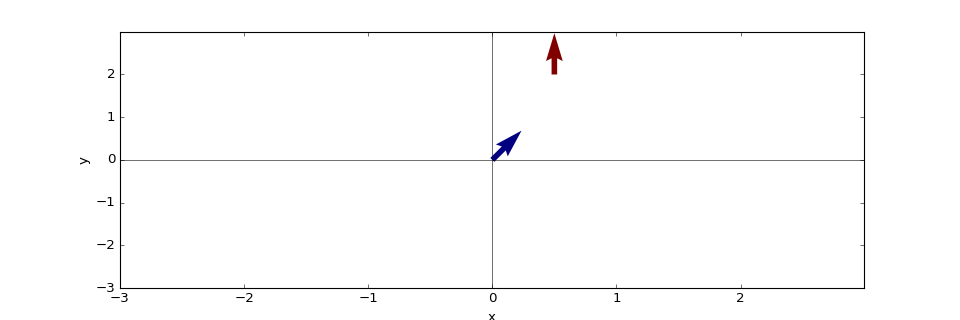

<function __main__.interactive_rotation_translation>

In [75]:
x0 = 0.0; y0=0.0
u0 = 1.0; v0=1.0

fig = None
def interactive_rotation_translation(theta, tx, ty):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure(figsize=(12,4))
    
    x1 = tx
    y1 = ty
    u1 = np.cos(theta * pi / 180.0) * u0 - np.sin(theta * pi / 180.0) * v0 
    v1 = np.sin(theta * pi / 180.0) * u0 + np.cos(theta * pi / 180.0) * v0
    plt.quiver([x0, x1], [y0, y1], [u0, u1], [v0, v1], [0, 1])
    plt.xlabel("x"); plt.ylabel("y")
    plt.xlim([np.min(x),np.max(x)]); plt.ylim([np.min(x),np.max(x)])
    plt.axvline(color='k', linewidth=0.5); plt.axhline(color='k', linewidth=0.5)

    
interact(interactive_rotation_translation,           
         theta=FloatSlider(value=45, min=0.1, max=359, continuous_update=False), 
         tx=FloatSlider(value=0.5, min=-3.0, max=3.0, continuous_update=False), 
         ty=FloatSlider(value=2.0, min=-3.0, max=3.0, continuous_update=False))

### Scaled rotation

Also known as the similarity transform, this transformation can be expressed as 

$$\mathbf{x}' = \left[ s \mathbf{R} \, \mathbf{t} \right] \mathbf{x} = \begin{bmatrix}
    a & -b & t_x \\
    b & a & t_y
\end{bmatrix} \mathbf{x}
$$


<IPython.core.display.Javascript object>


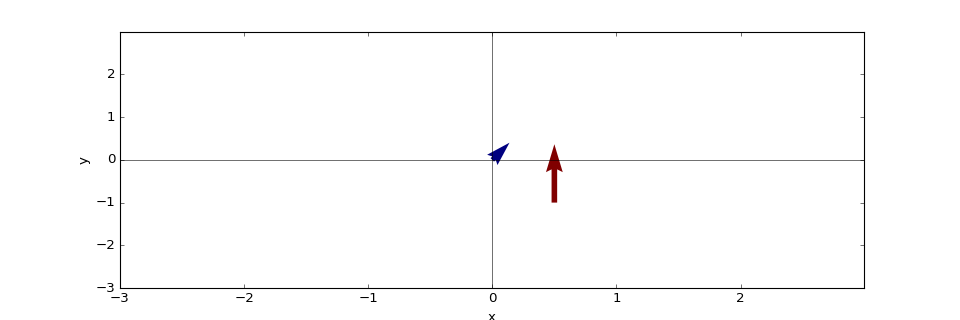

In [77]:
x0 = 0.0; y0=0.0
u0 = 1.0; v0=1.0

fig = None
def interactive_scaled_rotation_translation(scale, theta, tx, ty):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure(figsize=(12,4))
    
    x1 = tx
    y1 = ty
    u1 = scale * np.cos(theta * pi / 180.0) * u0 - scale * np.sin(theta * pi / 180.0) * v0 
    v1 = scale * np.sin(theta * pi / 180.0) * u0 + scale * np.cos(theta * pi / 180.0) * v0
    plt.quiver([x0, x1], [y0, y1], [u0, u1], [v0, v1], [0, 1])
    plt.xlabel("x"); plt.ylabel("y")
    plt.xlim([np.min(x),np.max(x)]); plt.ylim([np.min(x),np.max(x)])
    plt.axvline(color='k', linewidth=0.5); plt.axhline(color='k', linewidth=0.5)

    
interact(interactive_scaled_rotation_translation,  
         scale=FloatSlider(value=1.5, min=0.1, max=5.0, continuous_update=False),
         theta=FloatSlider(value=45, min=0.1, max=359, continuous_update=False), 
         tx=FloatSlider(value=0.5, min=-3.0, max=3.0, continuous_update=False), 
         ty=FloatSlider(value=2.0, min=-3.0, max=3.0, continuous_update=False))